In [41]:
# =========================================================
# 01_exploration.ipynb
# Retail Sales Forecasting - Exploratory Data Analysis
# =========================================================

# --------------------
# 1. Imports & Setup
# --------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set display options
pd.set_option('display.max_columns', None)

# --------------------
# 2. Data Paths
# --------------------
BASE_DIR = os.path.dirname(os.path.dirname(os.getcwd()))
DATA_PATH = os.path.join(BASE_DIR, 'data', 'raw')

train_path = os.path.join(DATA_PATH, 'train.csv')
stores_path = os.path.join(DATA_PATH, 'stores.csv')
features_path = os.path.join(DATA_PATH, 'features.csv')

# --------------------
# 3. Load Data
# --------------------
train_df = pd.read_csv('/Users/vishalcherupally/ML/data/raw/train.csv')
stores_df = pd.read_csv('/Users/vishalcherupally/ML/data/raw/stores.csv')
features_df = pd.read_csv('/Users/vishalcherupally/ML/data/raw/features.csv')

# Quick look
print("Train shape:", train_df.shape)
print("Stores shape:", stores_df.shape)
print("Features shape:", features_df.shape)

display(train_df.head())
display(stores_df.head())
display(features_df.head())

# --------------------
# 4. Basic Information
# --------------------
train_df.info()
train_df.describe()

# Check for missing values
train_df.isna().sum()

# --------------------
# 5. Data Preview and Sanity Checks
# --------------------
# Check for duplicates
train_df.duplicated().sum()

# Check date range and store distribution
print("Date range:", train_df['Date'].min(), "to", train_df['Date'].max())
print("Unique stores:", train_df['Store'].nunique())


Train shape: (421570, 5)
Stores shape: (45, 3)
Features shape: (8190, 12)


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB
Date range: 2010-02-05 to 2012-10-26
Unique stores: 45


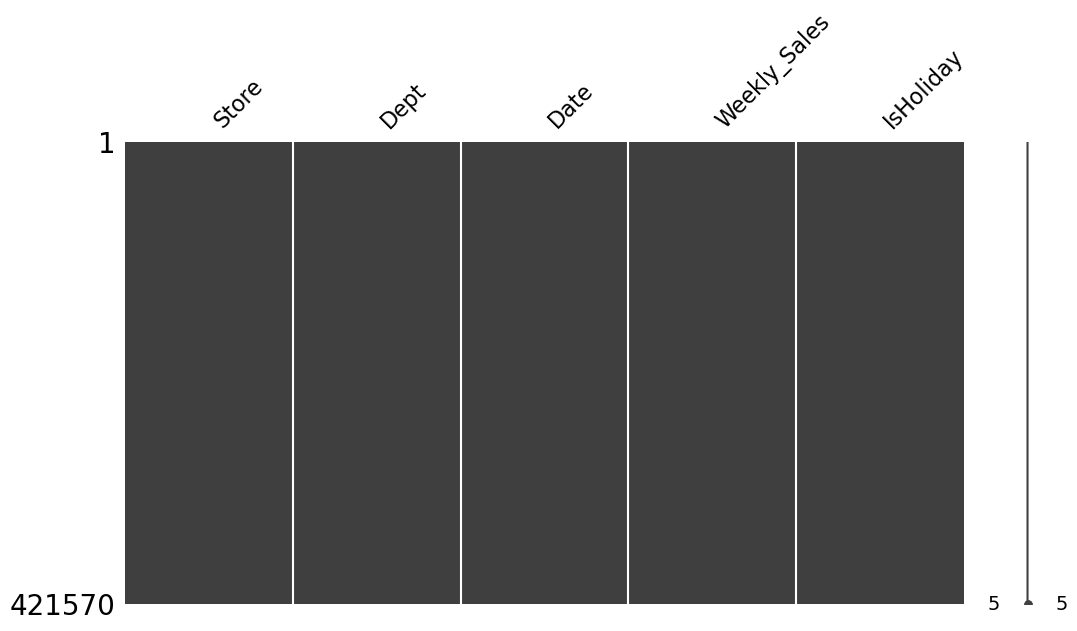

Series([], dtype: float64)

In [42]:
# --------------------
# 6. Missing Values Visualization
# --------------------
import missingno as msno
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


# Visualize missingness pattern
msno.matrix(train, figsize=(12,6))
plt.show()

# Percentage of missing values per column
missing_percent = train.isna().mean().round(3) * 100
missing_percent[missing_percent > 0].sort_values(ascending=False)


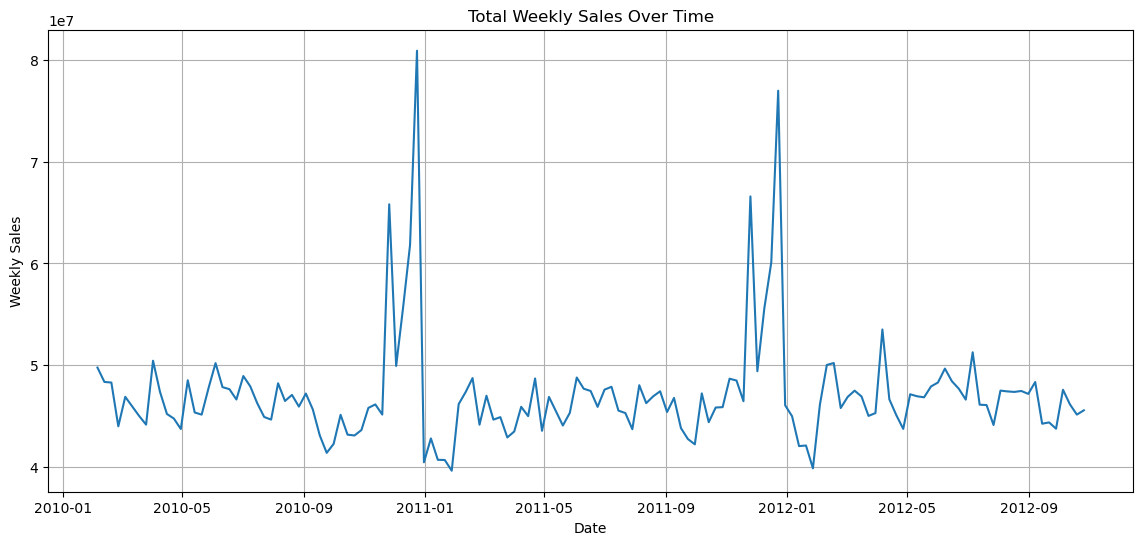

In [43]:
# --------------------
# 8. Sales Trend Over Time
# --------------------
train_df['Date'] = pd.to_datetime(train_df['Date'])

sales_by_date = train_df.groupby('Date')['Weekly_Sales'].sum().reset_index()

plt.figure(figsize=(14,6))
plt.plot(sales_by_date['Date'], sales_by_date['Weekly_Sales'])
plt.title("Total Weekly Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.grid(True)
plt.show()


In [44]:
train_df.columns.tolist()


['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday']

In [45]:
import pandas as pd

raw_path = "../data/raw"  # adjust if needed

# Check each file's columns
print("train.csv columns:", pd.read_csv(f"{raw_path}/train.csv").columns.tolist())
print("features.csv columns:", pd.read_csv(f"{raw_path}/features.csv").columns.tolist())
print("stores.csv columns:", pd.read_csv(f"{raw_path}/stores.csv").columns.tolist())


train.csv columns: ['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday']
features.csv columns: ['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday']
stores.csv columns: ['Store', 'Type', 'Size']


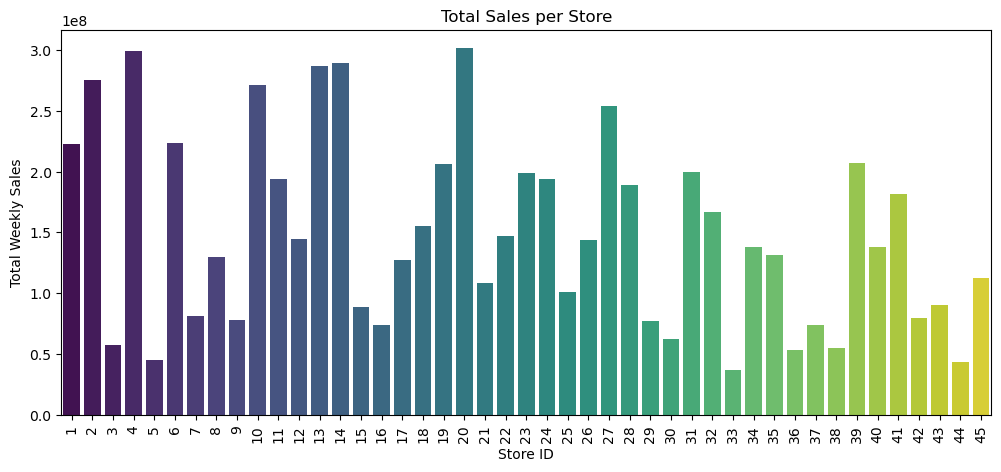

In [46]:
# --------------------
# 9. Sales per Store
# --------------------
store_sales = train_df.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(12,5))
sns.barplot(x=store_sales.index, y=store_sales.values, palette="viridis")
plt.title("Total Sales per Store")
plt.xlabel("Store ID")
plt.ylabel("Total Weekly Sales")
plt.xticks(rotation=90)
plt.show()


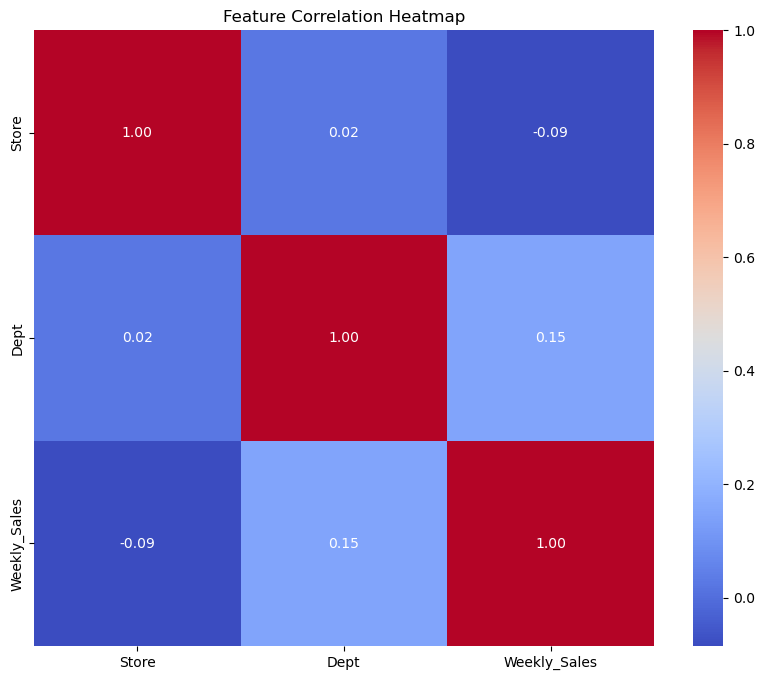

In [47]:
# --------------------
# 10. Correlation Heatmap
# --------------------
corr = train_df[num_cols].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


In [48]:
# Identify numeric columns (excluding categorical or date columns)
num_cols = train_df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Numeric columns:", num_cols)


Numeric columns: ['Store', 'Dept', 'Weekly_Sales']


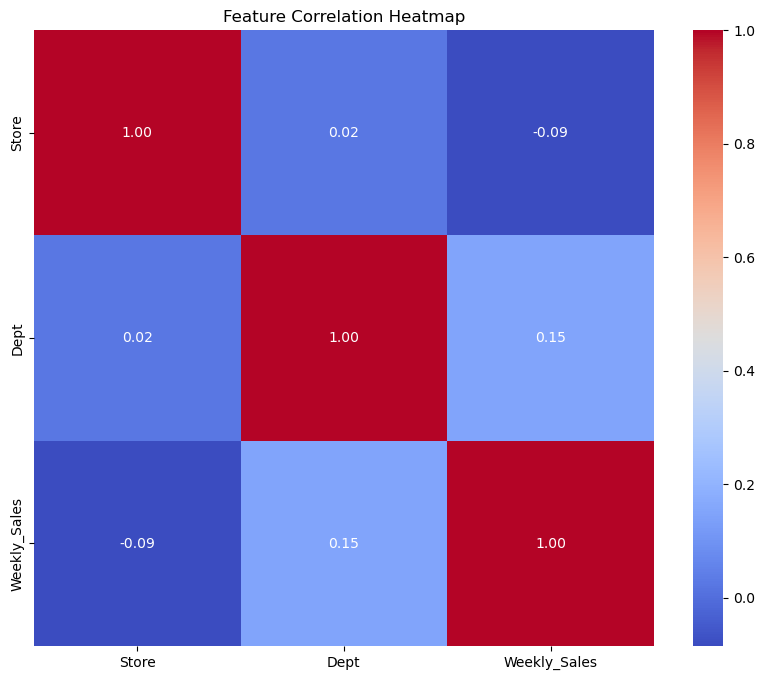

In [49]:
corr = train_df[num_cols].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


## Phase 1.5 — Data Preprocessing & Cleaning

In [50]:
# Check missing values
train_df.isnull().sum().sort_values(ascending=False)


Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [51]:
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(1), int64(2)
memory usage: 13.3 MB


In [52]:
# Check for duplicates
train_df.duplicated().sum()


0

In [53]:
train_df = train_df.drop_duplicates()


In [54]:
# Extract date-based features
train_df['Year'] = train_df['Date'].dt.year
train_df['Month'] = train_df['Date'].dt.month
train_df['Week'] = train_df['Date'].dt.isocalendar().week
train_df['Day'] = train_df['Date'].dt.day

# Preview the updated dataframe
train_df.head()


,Store,Dept,Date,Weekly_Sales,IsHoliday,Year,Month,Week,Day
0,1,1,2010-02-05,24924.50,False,2010,2,5,5
1,1,1,2010-02-12,46039.49,True,2010,2,6,12
2,1,1,2010-02-19,41595.55,False,2010,2,7,19
3,1,1,2010-02-26,19403.54,False,2010,2,8,26
4,1,1,2010-03-05,21827.90,False,2010,3,9,5


# Phase 1.6 — Exploratory Feature Insights

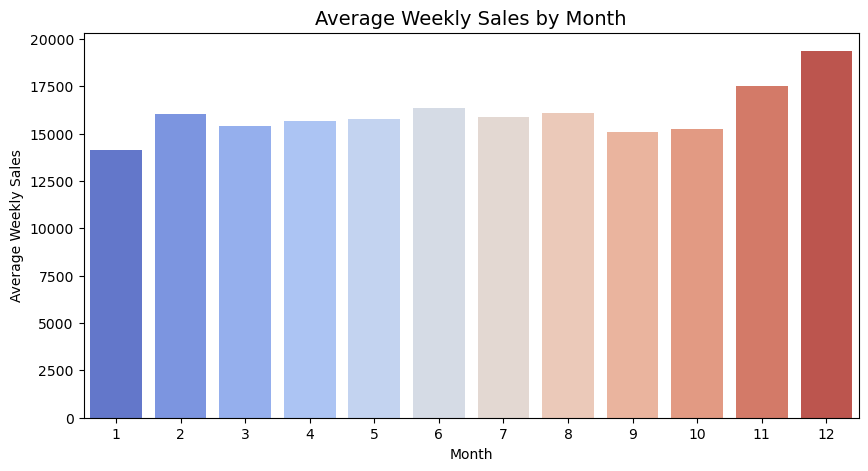

In [55]:
# Average sales by month
monthly_sales = train_df.groupby('Month')['Weekly_Sales'].mean().reset_index()

plt.figure(figsize=(10,5))
sns.barplot(data=monthly_sales, x='Month', y='Weekly_Sales', palette='coolwarm')
plt.title('Average Weekly Sales by Month', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Average Weekly Sales')
plt.show()


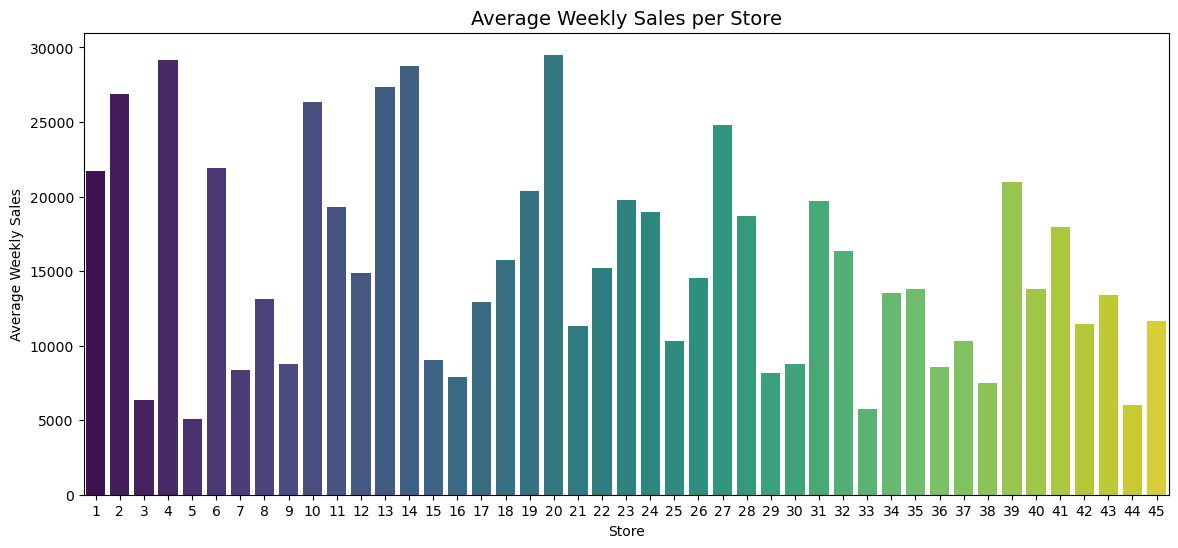

In [56]:
# Average weekly sales per store
store_sales = train_df.groupby('Store')['Weekly_Sales'].mean().reset_index()

plt.figure(figsize=(14,6))
sns.barplot(data=store_sales, x='Store', y='Weekly_Sales', palette='viridis')
plt.title('Average Weekly Sales per Store', fontsize=14)
plt.xlabel('Store')
plt.ylabel('Average Weekly Sales')
plt.show()


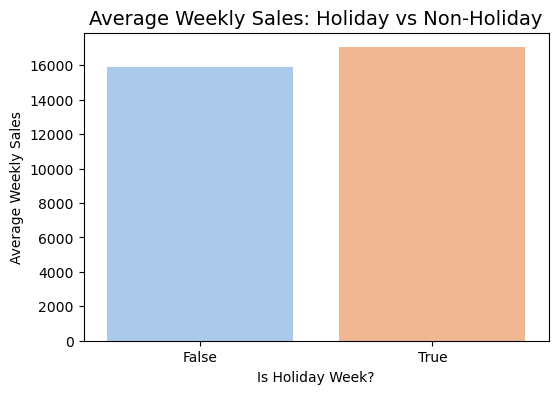

In [57]:
# Average sales for holiday vs non-holiday weeks
holiday_sales = train_df.groupby('IsHoliday')['Weekly_Sales'].mean().reset_index()

plt.figure(figsize=(6,4))
sns.barplot(data=holiday_sales, x='IsHoliday', y='Weekly_Sales', palette='pastel')
plt.title('Average Weekly Sales: Holiday vs Non-Holiday', fontsize=14)
plt.xlabel('Is Holiday Week?')
plt.ylabel('Average Weekly Sales')
plt.show()


## Phase 1.8 — Correlation Insights & Feature Selection Prep.

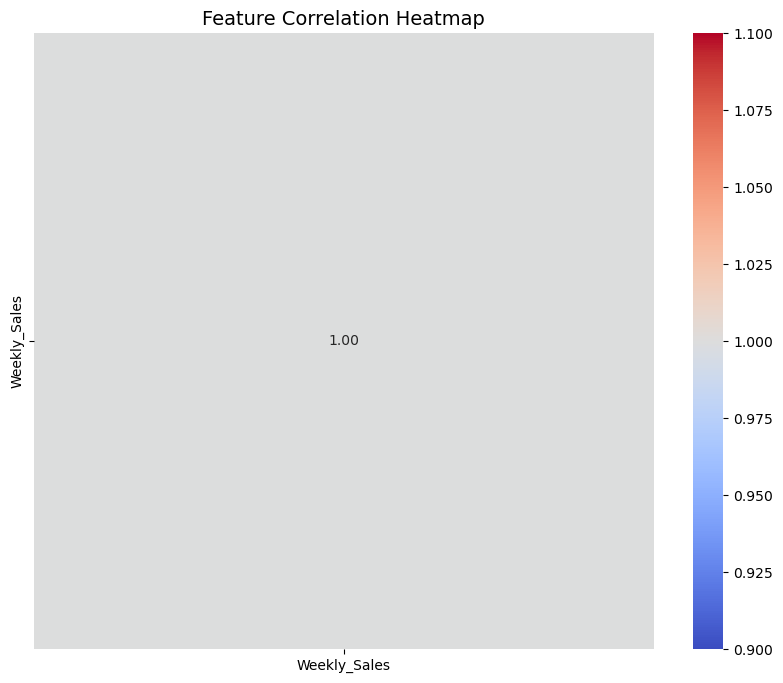

In [58]:
# Define numeric columns (excluding identifiers like Store/Dept)
num_cols = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'MarkDown1',
            'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5',
            'CPI', 'Unemployment']

# Filter columns that actually exist in train_df
num_cols = [col for col in num_cols if col in train_df.columns]

# Compute correlation matrix
corr = train_df[num_cols].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Heatmap", fontsize=14)
plt.show()


# 

In [59]:
# Check missing values again
missing = train_df.isnull().sum()
print(missing[missing > 0])


Series([], dtype: int64)


In [60]:
# Fill missing values (if any)
for col in train_df.columns:
    if train_df[col].dtype in ['float64', 'int64']:
        train_df[col].fillna(train_df[col].median(), inplace=True)
    else:
        train_df[col].fillna(train_df[col].mode()[0], inplace=True)


In [61]:
# Convert boolean to integer for ML compatibility
train_df['IsHoliday'] = train_df['IsHoliday'].astype(int)


In [62]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(train_df[num_cols])


### Model Training

In [63]:
# Sort the dataframe by date just to be safe
train_df = train_df.sort_values("Date")

# Determine split index (80% training)
split_index = int(len(train_df) * 0.8)

# Split data chronologically
train_data = train_df.iloc[:split_index]
test_data = train_df.iloc[split_index:]

# Confirm split sizes
print(f"Train shape: {train_data.shape}")
print(f"Test shape: {test_data.shape}")


Train shape: (337256, 9)
Test shape: (84314, 9)


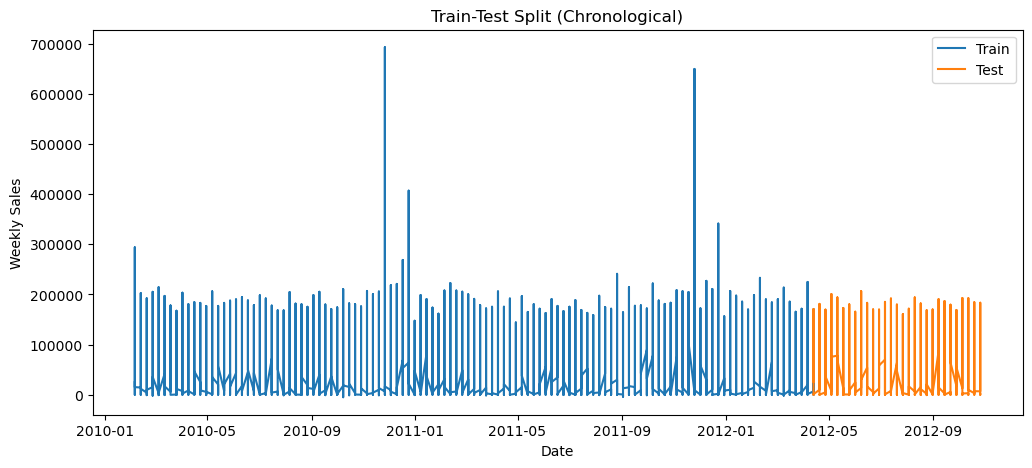

In [64]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(train_data['Date'], train_data['Weekly_Sales'], label='Train')
plt.plot(test_data['Date'], test_data['Weekly_Sales'], label='Test')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.title('Train-Test Split (Chronological)')
plt.legend()
plt.show()


In [69]:
train_data.to_csv("/Users/vishalcherupally/ML/data/processed/train_data.csv", index=False)
test_data.to_csv("/Users/vishalcherupally/ML/data/processed/test_data.csv", index=False)

print("Train and test datasets saved successfully.")


Train and test datasets saved successfully.


In [70]:
# Example: 80% train, 20% test
split_date = train_df['Date'].quantile(0.8)
train_data = train_df[train_df['Date'] <= split_date]
test_data = train_df[train_df['Date'] > split_date]


In [72]:
print("Train data range:", train_data['Date'].min(), "to", train_data['Date'].max())
print("Test data range:", test_data['Date'].min(), "to", test_data['Date'].max())

# Verify there’s no overlap
if train_data['Date'].max() < test_data['Date'].min():
    print("✅ Data continuity check PASSED — no overlap between train and test.")
else:
    print("❌ Data continuity check FAILED — verify your split logic.")


Train data range: 2010-02-05 00:00:00 to 2012-04-13 00:00:00
Test data range: 2012-04-20 00:00:00 to 2012-10-26 00:00:00
✅ Data continuity check PASSED — no overlap between train and test.


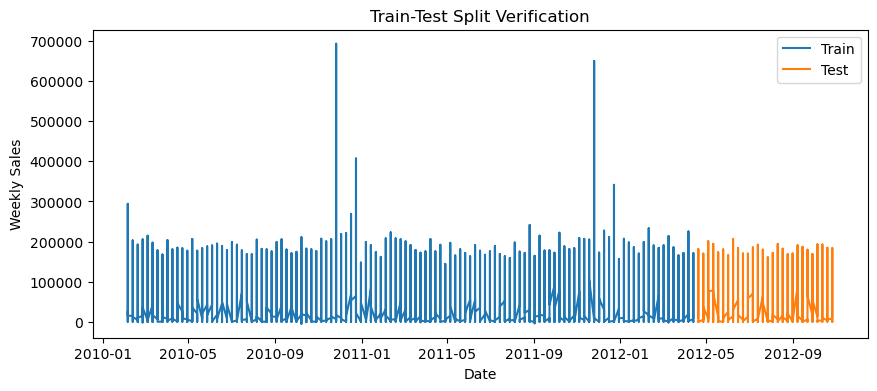

In [73]:
plt.figure(figsize=(10,4))
plt.plot(train_data['Date'], train_data['Weekly_Sales'], label="Train")
plt.plot(test_data['Date'], test_data['Weekly_Sales'], label="Test")
plt.legend()
plt.title("Train-Test Split Verification")
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.show()


In [76]:
train_data.to_csv("/Users/vishalcherupally/ML/data/processed/train_data.csv", index=False)
test_data.to_csv("/Users/vishalcherupally/ML/data/processed/test_data.csv", index=False)
print("Train and test datasets saved successfully after verification ✅")


Train and test datasets saved successfully after verification ✅


## Phase 3.0 — Feature Engineering Overview

In [77]:
train_df['Year'] = train_df['Date'].dt.year
train_df['Month'] = train_df['Date'].dt.month
train_df['Week'] = train_df['Date'].dt.isocalendar().week
train_df['Day'] = train_df['Date'].dt.day
train_df['DayOfWeek'] = train_df['Date'].dt.dayofweek
train_df['IsWeekend'] = train_df['DayOfWeek'].isin([5,6]).astype(int)
train_df['Quarter'] = train_df['Date'].dt.quarter


In [78]:
train_df = train_df.sort_values(by=['Store', 'Dept', 'Date'])
train_df['Weekly_Sales_Lag1'] = train_df.groupby(['Store','Dept'])['Weekly_Sales'].shift(1)
train_df['Weekly_Sales_Lag2'] = train_df.groupby(['Store','Dept'])['Weekly_Sales'].shift(2)


In [79]:
train_df['Weekly_Sales_RollMean3'] = train_df.groupby(['Store','Dept'])['Weekly_Sales'].transform(lambda x: x.rolling(3).mean())
train_df['Weekly_Sales_RollMean6'] = train_df.groupby(['Store','Dept'])['Weekly_Sales'].transform(lambda x: x.rolling(6).mean())


In [80]:
train_df.fillna(method='bfill', inplace=True)


In [82]:
train_df.to_csv("/Users/vishalcherupally/ML/data/processed/featured_train.csv", index=False)
print("✅ Feature engineering completed and saved to /Users/vishalcherupally/ML/data/processed/featured_train.csv")


✅ Feature engineering completed and saved to /Users/vishalcherupally/ML/data/processed/featured_train.csv
